In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
pip install yfinance

In [3]:
import yfinance as yf

In [4]:
start = '2010-01-01'
end = '2019-12-31'

# Fetch stock data using yfinance
df = yf.download('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908997,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342979,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316284,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733620,144114400


In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


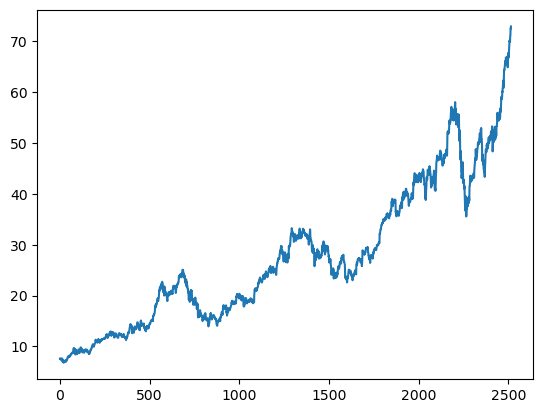

In [9]:
plt.plot(df.Close)

In [10]:
(df)

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [11]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

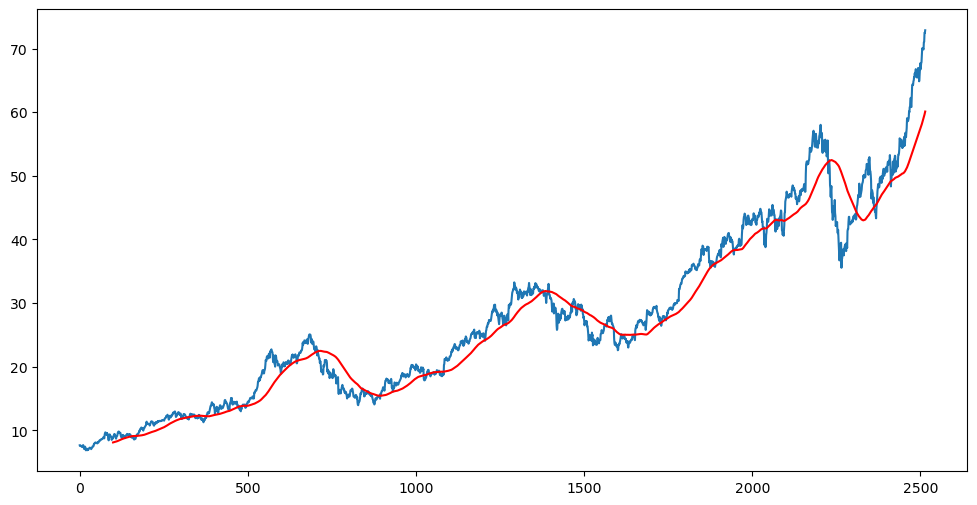

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
print(ma200)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64


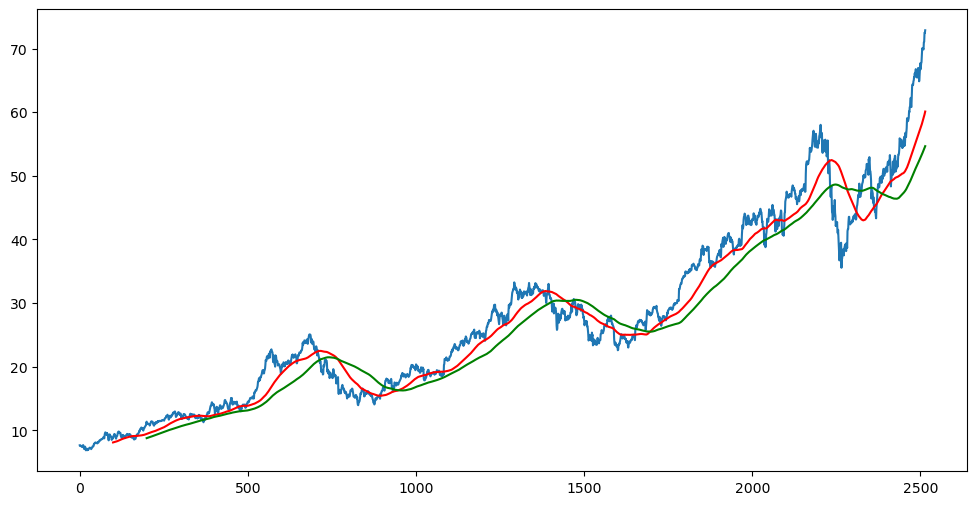

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [15]:
df.shape

(2515, 5)

splitting data into training and testing

In [17]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])
                          

In [18]:
data_training.shape

(1760, 1)

In [19]:
data_testing.shape


(755, 1)

In [20]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [21]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [22]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range =(0,1))


In [23]:
data_training_scaler = Scaler.fit_transform(data_training)
data_training_scaler

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [24]:
x_train = []
y_train = []
for i in range(100,data_training_scaler.shape[0]):
    x_train.append(data_training_scaler[i-100:i])
    y_train.append(data_training_scaler[i,0])
x_train,y_train =np.array(x_train),np.array(y_train)

ML model

In [26]:
pip install keras

In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [29]:
from keras.layers import Input
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units = 50, activation = 'relu',return_sequences=True ))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu',return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences=True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
from keras.optimizers import Adam
optimizer = Adam(clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - loss: 0.0023
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0021
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 0.0023
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 0.0021
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 0.0021
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0023
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - loss: 0.0022
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 0.0021
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 0.0022
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 0.0021
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 0.0023
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0021
Epoch 13/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 0.0021
Epoch 14/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 0.0021
Epoch 15/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 9

In [118]:
model.save('my_model.keras')

In [120]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [122]:
last_100_days = data_training.tail(100)

In [124]:
final_df = pd.concat([last_100_days, data_testing], ignore_index=True)


In [126]:
final_df

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
850,71.000000
851,71.067497
852,72.477501
853,72.449997


In [128]:
input_data =Scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [130]:
input_data.shape

(855, 1)

In [132]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [134]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [136]:
x_test.shape

(755, 100, 1)

In [138]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

Making Predictions 

In [140]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step


In [142]:
y_predicted.shape

(755, 1)

In [144]:
y_test.shape

(755,)

In [146]:
y_predicted

array([[0.13468221],
       [0.13576591],
       [0.13692802],
       [0.13811702],
       [0.13934559],
       [0.1406534 ],
       [0.14212054],
       [0.14379045],
       [0.14556912],
       [0.14741123],
       [0.14913741],
       [0.15063578],
       [0.15199986],
       [0.15325364],
       [0.1543569 ],
       [0.15532726],
       [0.15618744],
       [0.15693164],
       [0.15781364],
       [0.1588383 ],
       [0.15990609],
       [0.16089064],
       [0.16171578],
       [0.16343565],
       [0.16596372],
       [0.16896023],
       [0.17227097],
       [0.17585939],
       [0.17961776],
       [0.18342718],
       [0.18710342],
       [0.19074135],
       [0.1946678 ],
       [0.19885561],
       [0.20304097],
       [0.20713708],
       [0.21128152],
       [0.2154557 ],
       [0.21936564],
       [0.22292851],
       [0.22620203],
       [0.22921789],
       [0.23266797],
       [0.23626466],
       [0.23991966],
       [0.24310948],
       [0.2457703 ],
       [0.247

In [148]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [150]:
Scaler.scale_

array([0.02123255])

In [152]:
Scale_factor = 1/Scaler.scale_[0]
y_predicted = y_predicted*Scale_factor
y_test = y_test * Scale_factor

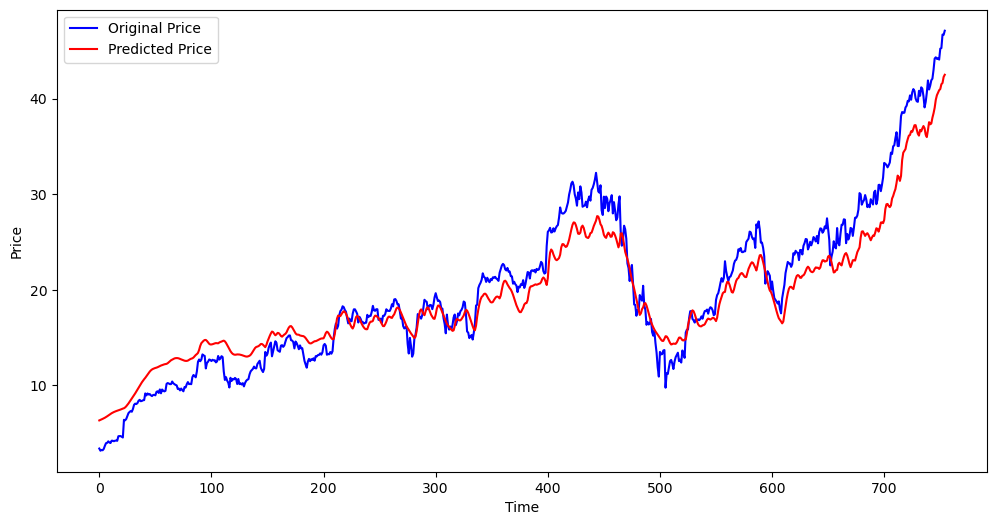

In [154]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [107]:
print(np.isnan(x_test).sum())  # Should be 0 if there are no NaN values


0


In [105]:
print(x_test.shape)


(755, 100, 1)
